# Lambda School Data Science - Basic Data Visualizations

A picture is worth a thousand words. So, without any further ado:

## Lecture Example

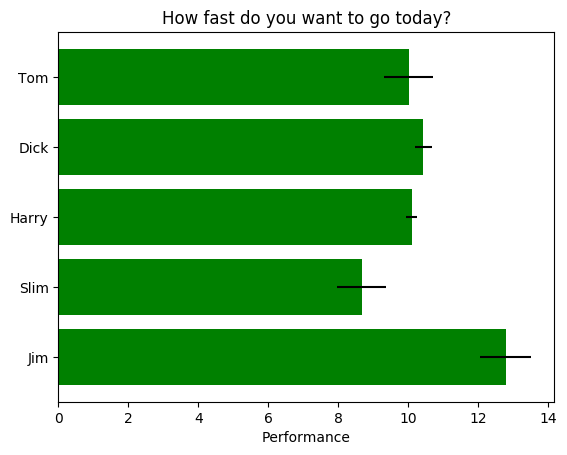

In [1]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

The above is fairly clear. It's a lot less clear as a piechart.

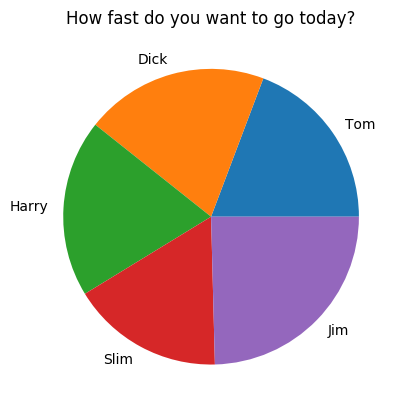

In [2]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


What about continuous data? Scatterplot is a natural fit, and higher dimensions can be represented by size, color, or other visual aspects of the points.

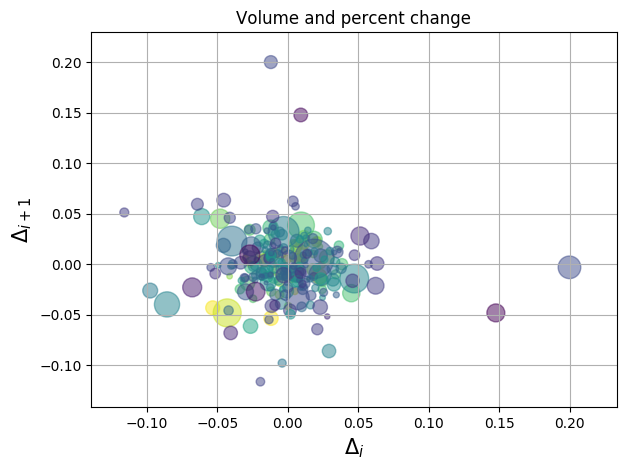

In [3]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

An alternative way to represent higher dimensional data is with 3D scatterplots - but these are pretty hard to look at. Specifically, if it's not interactive (you can't drag it and move it around), your eye may not be able to distinguish which spatial dimension is separating two specific points.

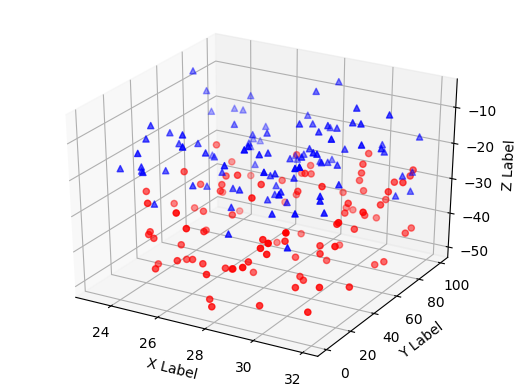

In [4]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Live lecture - let's pick some plots and try them!
- https://matplotlib.org/gallery - the foundational Python plotting library
- https://seaborn.pydata.org/examples/index.html - opinionated, built on matplotlib so less configurable but arguably more usable/pretty (or easy to make pretty)
- http://ggplot.yhathq.com/ - based on R's ggplot2 (the "Grammar of Graphics", a consistent and widely used foundation of plotting, particularly by academics)
- https://bokeh.pydata.org/en/latest/ - interactive plots - write in Python, build and serve in HTML and JavaScript
- https://plot.ly/ - similar to Bokeh but with a commercial service (though the software itself is still open source)
- https://altair-viz.github.io/ - declarative visual graphics - a little different than the matplotlib/seaborn paradigm (based on the Vega Visualization Grammar) 
- https://python.libhunt.com/seaborn-alternatives - even more!



# **Adult Data**

---


In [0]:
# Pull in DS

import pandas as pd

adult_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

adult_data = pd.read_csv(adult_data_url, header=None, names=['Age','WorkClass','Fnlwgt','Education','EducationNum','Marital-Status','Occupation','Relationship','Race','Sex','Capital-Gain','Capital-Loss','hrs-per-wk','Native-Country','class'])

**Attribute Information:**

This data was collected from a 1994 census. Predicts whether a person makes over 50K a year or not. 

->50K, <=50K. 
- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. 
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, - Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [9]:
# Types of Data
adult_data.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
EducationNum       int64
Marital-Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-Gain       int64
Capital-Loss       int64
hrs-per-wk         int64
Native-Country    object
class             object
dtype: object

In [0]:
# The original DS has Missing Values represented by '?'
# I have to change '?' to NaN 
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean, median, mode

clean_data = adult_data.replace('[?]', np.NaN, regex=True)


# Now, I want to fill in the NaNs 
# Forward Fill 
adult_fill = clean_data.ffill()



## **Bar Plots**

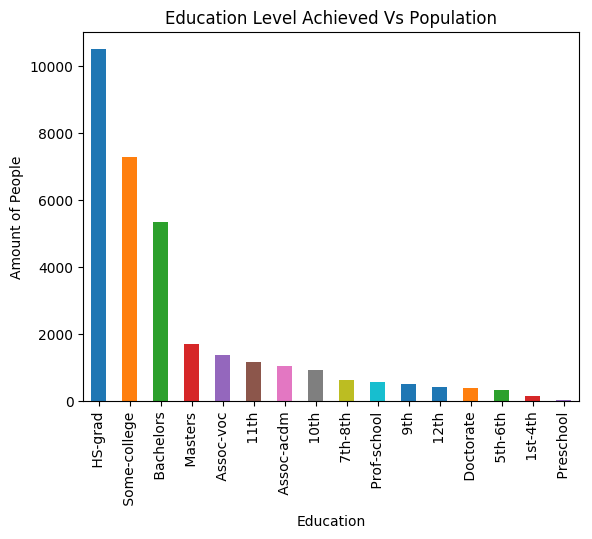

In [13]:
# Bar plot
clean_data['Education'].value_counts().plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Amount of People')
plt.title('Education Level Achieved Vs Population')
#ax.bar(clean_data['Age'], clean_data['Education'])
plt.show()


This plot was intended to show the correlation between the people who took the census and their education levels achieved. As you can see based on the chart, the most common educational level reached was high school, with over 10,000 people. Second most being, some college level acieved and third most common being bachelors degree. 

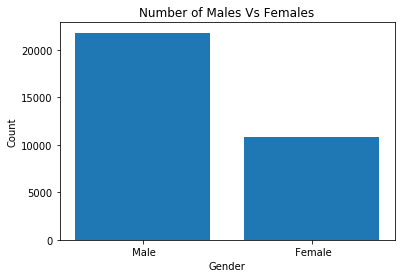

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


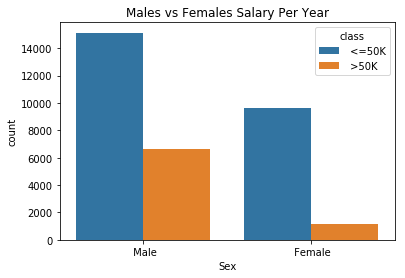

In [57]:
%matplotlib inline
# Let's start by visualizing the distribution of gender in the dataset.  
fig, ax = plt.subplots()  
x = adult_data.Sex.unique()  
# Counting 'Males' and 'Females' in the dataset  
y = adult_data.Sex.value_counts()  
# Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Gender')  
ax.set_ylabel('Count')  
plt.title('Number of Males Vs Females')
plt.show();

import seaborn as sns
sns.countplot(adult_data.Sex, hue=adult_data['class'])  
plt.title('Males vs Females Salary Per Year')
plt.show();


The purpose of these 2 graphs was to show out of this dataset how many are male, or female. Males being the most common that were surveyed. 
The second graph takes it a step further and shows male vs female and salary earned. Over 14,000 males, based on this dataset earn more than 50k per year vs only about 10,000 females earning over 50k per year. The orange bars represent males and females earning under 50K per year. 

## Scatterplot



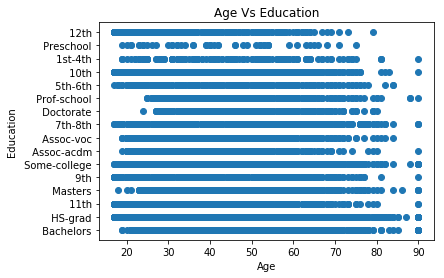

In [59]:
plt.scatter(clean_data['Age'], adult_data['Education'])
plt.xlabel('Age')
plt.ylabel('Education')
plt.title('Age Vs Education');


Not sure if this still qualifies as a scatterplot, since the data is pretty lined up. This graph shows Age vs Education level achieved. A little difficult to understand using this chart. Would appreciate any pointers. 

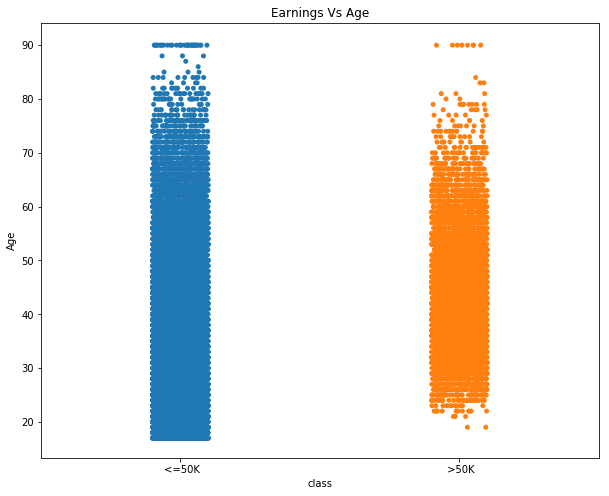

In [53]:
fig, ax= plt.subplots(figsize=(10, 8))  
sns.stripplot(clean_data['class'], clean_data['Age'], jitter=True, ax=ax)  
ax.set_title('Earnings Vs Age')  
plt.show() 

This plot is very fun. I like how clean the display is and how easy it is to interpret. 
Basically, the plot is split into 2 columns: Earnings over 50K/ Earnings under 50K.
From there, you can take a look at the Y Axis and see the age of people who earn over/under the 50K marker. 

## **Line Plot**

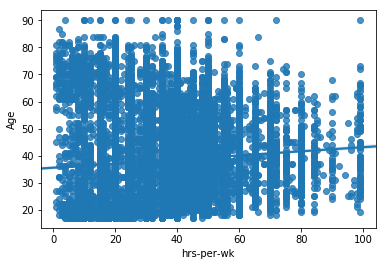

In [61]:
sns.regplot(x=clean_data["hrs-per-wk"], y=clean_data["Age"])
sns.plt.show()

This plot shows hours worked per week and how that relates to age. Obviously, the higher the age, the less hours worked per week. 

## Assignment - draw some plots!

In the following section you should draw at least *3* plots, using the data you loaded yesterday - the first should be with matplotlib. The other two can be with any Python tool of your choice - Seaborn in particular is suggested to try. It is OK to start with code from a gallery/example or whatever documentation you find, but try to get it working with your own data.

After you make the plots, write a summary (around a paragraph) for each plot, interpreting and describing it and what insight it gives you into the data. This summary should be written for an "interested but non-technical" audience - that is usually the sort of audience data scientists communicate with. Try to *explain* what's going on without making it scary.

Stretch goals:
- Interactive plots! (from the above tools, either Bokeh or plot.ly)
- 3D plots that are intuitive/informative (and probably also interactive)
- Share your plot! Take a screenshot and drop it in the cohort channel or elsewhere in Slack
- Deploy! If it's interactive, you can put it out there (plot.ly will host your plot for you, and Bokeh will make an HTML file)
- Work on your local Python setup - so far we've just used Colab, but [Anaconda](https://www.anaconda.com/download/) is a local environment for Python that lets you do everything you can in Colab and more